In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv", encoding='latin1')

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
print(df.CustomerID.nunique())
df.CustomerID = df.CustomerID.fillna(1)
df.isna().sum()

4372


InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [6]:
df[df.Description.isna()]["CustomerID"]


622       1.0
1970      1.0
1971      1.0
1972      1.0
1987      1.0
         ... 
535322    1.0
535326    1.0
535332    1.0
536981    1.0
538554    1.0
Name: CustomerID, Length: 1454, dtype: float64

In [7]:
df.Description.dropna()

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 540455, dtype: object

In [8]:
df.CustomerID.value_counts().head()

CustomerID
1.0        135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
Name: count, dtype: int64

In [9]:
df[(df.CustomerID == 1) & (df.StockCode == '22139')]['Description'].value_counts(dropna=False)



Description
RETROSPOT TEA SET CERAMIC 11 PC     139
NaN                                   4
amazon                                1
Name: count, dtype: int64

In [10]:
df[df['Description'].isna()].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,1.0,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,1.0,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,1.0,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,1.0,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,1.0,United Kingdom


In [23]:
zero_prices = df[df['UnitPrice'] == 0.0 ]
print(zero_prices.count())

negative_prices = df[df['UnitPrice'] < 0]

negative_prices.count()

InvoiceNo      2515
StockCode      2515
Description    1061
Quantity       2515
InvoiceDate    2515
UnitPrice      2515
CustomerID     2515
Country        2515
dtype: int64


InvoiceNo      2
StockCode      2
Description    2
Quantity       2
InvoiceDate    2
UnitPrice      2
CustomerID     2
Country        2
dtype: int64

In [40]:
guest_validinfo = df[(df.CustomerID == 1.0) & (df.UnitPrice > 0.0) & (df['Description'].notna())]

guest_notvalidinfo = df[(df.CustomerID == 1.0) & (df.UnitPrice == 0.0)]

guest_notvalidinfo.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,1.0,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,1.0,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,1.0,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,1.0,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,1.0,United Kingdom


(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 5.000e+00, 4.000e+00, 2.100e+01, 4.500e+01,
        2.359e+03, 2.700e+01, 3.000e+00, 0.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([-9600. , -8841.6, -8083.2, -7324.8, -6566.4, -5808. , -5049.6,
        -4291.2, -3532.8, -2774.4, -2016. , -1257.6,  -499.2,   259.2,
         1017.6,  1776. ,  2534.4,  3292.8,  4051.2,  4809.6,  5568. ]),
 <BarContainer object of 20 artists>)

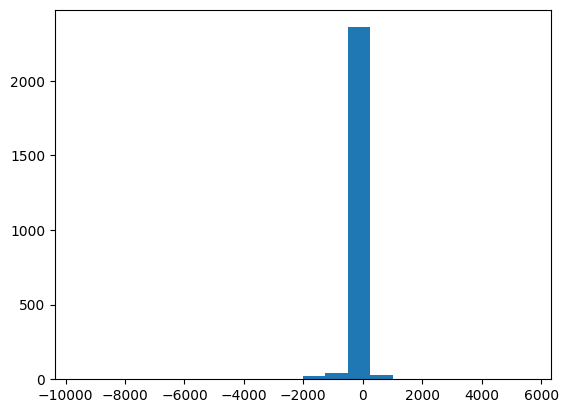

In [50]:
guest_notvalidinfo['Quantity'].value_counts()

plt.hist(guest_notvalidinfo['Quantity'], bins=20)

In [49]:
guest_notvalidinfo.describe()

,Quantity,UnitPrice,CustomerID
count,2475.000000,2475.0,2475.0
mean,-59.894141,0.0,1.0
std,481.882161,0.0,0.0
min,-9600.000000,0.0,1.0
25%,-34.000000,0.0,1.0
50%,-2.000000,0.0,1.0
75%,3.000000,0.0,1.0
max,5568.000000,0.0,1.0
